https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [3]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [4]:
print(len(twenty_train.data))
print(len(twenty_train.filenames))

2257
2257


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [6]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [8]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [9]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty='l2', dual=False, tol=1e-3)
clf.fit(X_train_tfidf, twenty_train.target)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)

In [11]:
docs_new = ['God is not GPU', 'OpenGL on the GPU is love', 'God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is not GPU' => comp.graphics
'OpenGL on the GPU is love' => comp.graphics
'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [12]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(penalty='l2', dual=False, tol=1e-3)),
])

text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0))])

In [13]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.9214380825565912

In [14]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.83      0.89       319
         comp.graphics       0.90      0.97      0.93       389
               sci.med       0.95      0.91      0.93       396
soc.religion.christian       0.90      0.96      0.93       398

           avg / total       0.92      0.92      0.92      1502



In [15]:
metrics.confusion_matrix(twenty_test.target, predicted)

array([[264,   7,  12,  36],
       [  3, 377,   5,   4],
       [  5,  27, 360,   4],
       [  4,   9,   2, 383]], dtype=int64)

In [16]:
def matrix_confusao(y_test, y_pred, labels):
    from sklearn.metrics import confusion_matrix  
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    %matplotlib inline

    cm = confusion_matrix(y_test, y_pred) 

    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=labels, yticklabels=labels, cmap='YlGnBu')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')

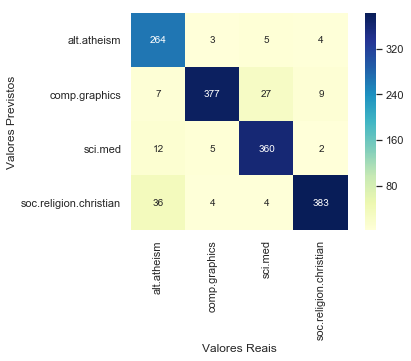

In [17]:
matrix_confusao(twenty_test.target, predicted, twenty_test.target_names)